In [93]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import Audio

In [94]:
from glob import glob
import os
import sys

import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [95]:
#importing RAVDESS
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(Ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [96]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [97]:
#reading from RAVDESS directory and combining into df
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df


,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
1435,fear,/kaggle/input/ravdess-emotional-speech-audio/a...
1436,angry,/kaggle/input/ravdess-emotional-speech-audio/a...
1437,sad,/kaggle/input/ravdess-emotional-speech-audio/a...
1438,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...


<Axes: xlabel='Emotions'>

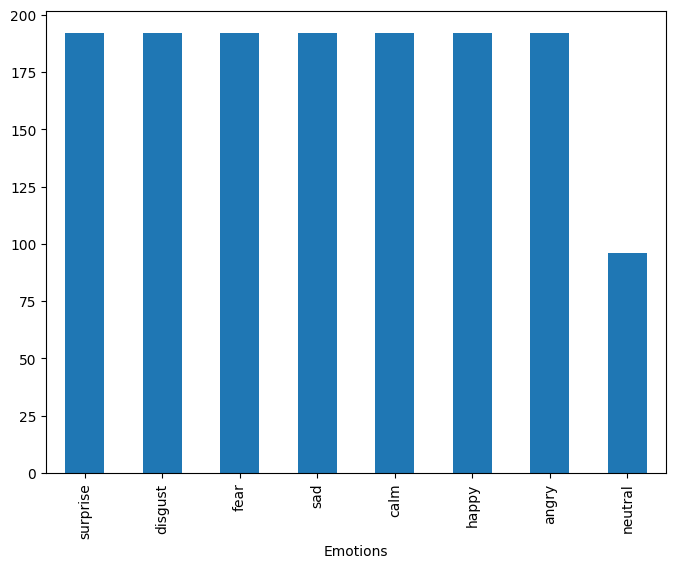

In [98]:
#distribution of emotions in RAVDESS
Ravdess_df['Emotions'].value_counts().plot(kind='bar', figsize=(8, 6))

/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_23/03-01-03-01-01-01-23.wav
22050


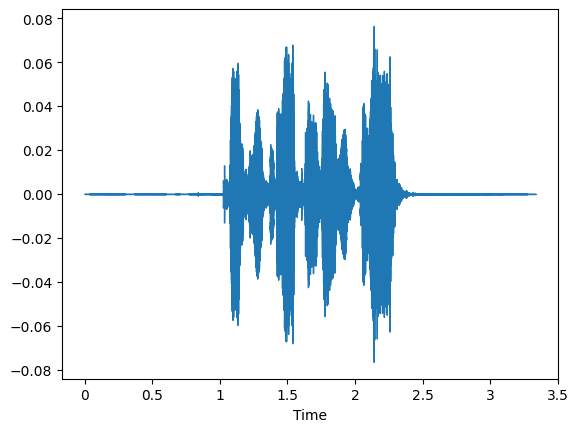

In [100]:
#listen to the Audio
emotion ='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[100] #by changing the emotion and index we can chage audios and waveplots
print(path)

data, sampling_rate = librosa.load(path)

print(sampling_rate)

librosa.display.waveshow(data, sr = sampling_rate)  #waveform
Audio(path)

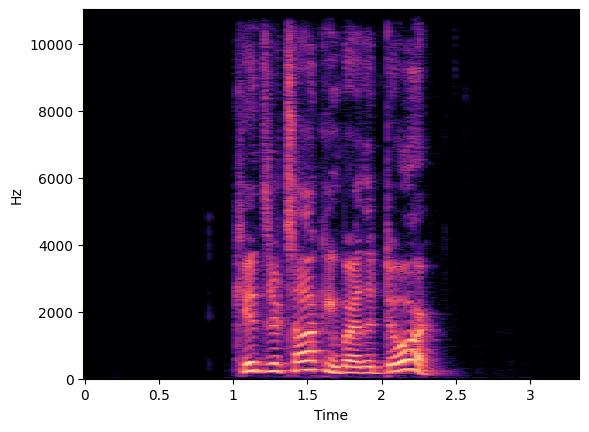

In [101]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr= sampling_rate, x_axis='time', y_axis='hz') #this spectogram shows the "amount" of frequency present audio  
Audio(path)

In [102]:
#Actually, for a classification problem it is best to have a few thousand entries for each class. 
#In case of RAVDESS dataset it does not hold true, so it is necessary to find mode datasets for this spesific problem.

In [103]:
#upload CREMA-D
Crema = '/kaggle/input/cremad/AudioWAV'
crema_directory_list = os.listdir(Crema)

In [104]:
#read and combine into df
EMOTION_CODES = {
    'ANG': 'angry',
    'DIS': 'disgust',
    'HAP': 'happy',
    'FEA': 'fear',
    'NEU': 'neutral',
    'SAD': 'sad'
}

def map_emotion(code):
    return EMOTION_CODES.get(code, 'Unknown')
    
c_file_path = [os.path.join(Crema, f) for f in crema_directory_list]
c_file_emotion = [map_emotion(f.split('_')[2]) for f in crema_directory_list]


Crema_df = pd.DataFrame({
    'Emotions': c_file_emotion,
    'Path': c_file_path,
})

print(Crema_df)

     Emotions                                               Path
0     disgust  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1       happy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2       happy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3     disgust  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4     disgust  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
...       ...                                                ...
7437    angry  /kaggle/input/cremad/AudioWAV/1060_IEO_ANG_MD.wav
7438    angry  /kaggle/input/cremad/AudioWAV/1088_IWL_ANG_XX.wav
7439    angry  /kaggle/input/cremad/AudioWAV/1050_IOM_ANG_XX.wav
7440      sad  /kaggle/input/cremad/AudioWAV/1044_IWL_SAD_XX.wav
7441      sad  /kaggle/input/cremad/AudioWAV/1009_ITH_SAD_XX.wav

[7442 rows x 2 columns]


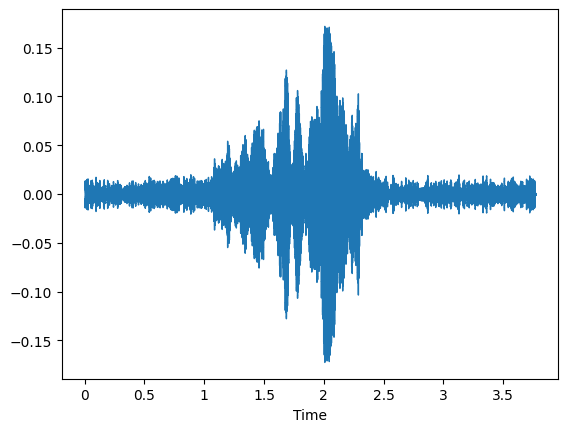

In [105]:
c_path = np.array(Crema_df.Path[Crema_df.Emotions=='fear'])[0]
data, sampling_rate = librosa.load(c_path)
librosa.display.waveshow(data, sr = sampling_rate)  
Audio(c_path)

In [106]:
#upload TESS
Tess = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'
tess_directory_list = os.listdir(Tess)

In [107]:
#read TESS and combine into df
EMOTION_MAP = {'ps': 'surprise'}

file_data = [
    {
        'Emotions': EMOTION_MAP.get(fname.split('.')[0].split('_')[2], 
                                  fname.split('.')[0].split('_')[2]),
        'Path': os.path.join(Tess, dirname, fname)
    }
    for dirname in os.listdir(Tess)
    for fname in os.listdir(os.path.join(Tess, dirname))
]

Tess_df = pd.DataFrame(file_data)
Tess_df.head()

Tess_df

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...
...,...,...
2795,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2796,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2797,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2798,surprise,/kaggle/input/toronto-emotional-speech-set-tes...


In [108]:
#read SAVEE
Savee = '/kaggle/input/savee-database/AudioData'
savee_directory_list = os.listdir(Savee) 

In [109]:
Savee1 = "/kaggle/input/savee-database/AudioData/DC/"
Savee2 = "/kaggle/input/savee-database/AudioData/JE/"
Savee3 = "/kaggle/input/savee-database/AudioData/JK/"
Savee4 = "/kaggle/input/savee-database/AudioData/KL/"
L=[Savee1,Savee2,Savee3,Savee4]
file_emotion=[]
file_path=[]

for i in L:
    savee_directory_list= os.listdir(i)
    
    for file in savee_directory_list:
        file_path.append(i+file)
        ele=file[:-6]
        if ele=='a':
            file_emotion.append('angry')
        elif ele=='d':
            file_emotion.append('disgust')
        elif ele=='f':
            file_emotion.append('fear')
        elif ele=='h':
            file_emotion.append('happy')
        elif ele=='n':
            file_emotion.append('neutral')
        elif ele=='sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
            
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df

,Emotions,Path
0,neutral,/kaggle/input/savee-database/AudioData/DC/n26.wav
1,surprise,/kaggle/input/savee-database/AudioData/DC/su06...
2,surprise,/kaggle/input/savee-database/AudioData/DC/su01...
3,happy,/kaggle/input/savee-database/AudioData/DC/h10.wav
4,surprise,/kaggle/input/savee-database/AudioData/DC/su10...
...,...,...
475,angry,/kaggle/input/savee-database/AudioData/KL/a04.wav
476,neutral,/kaggle/input/savee-database/AudioData/KL/n05.wav
477,sad,/kaggle/input/savee-database/AudioData/KL/sa12...
478,sad,/kaggle/input/savee-database/AudioData/KL/sa05...


In [111]:
df_merged = pd.concat([Ravdess_df, Tess_df, Crema_df, Savee_df], ignore_index=True, sort=False)
df_merged #merge all dataframes 

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
12157,angry,/kaggle/input/savee-database/AudioData/KL/a04.wav
12158,neutral,/kaggle/input/savee-database/AudioData/KL/n05.wav
12159,sad,/kaggle/input/savee-database/AudioData/KL/sa12...
12160,sad,/kaggle/input/savee-database/AudioData/KL/sa05...


<Axes: xlabel='Emotions'>

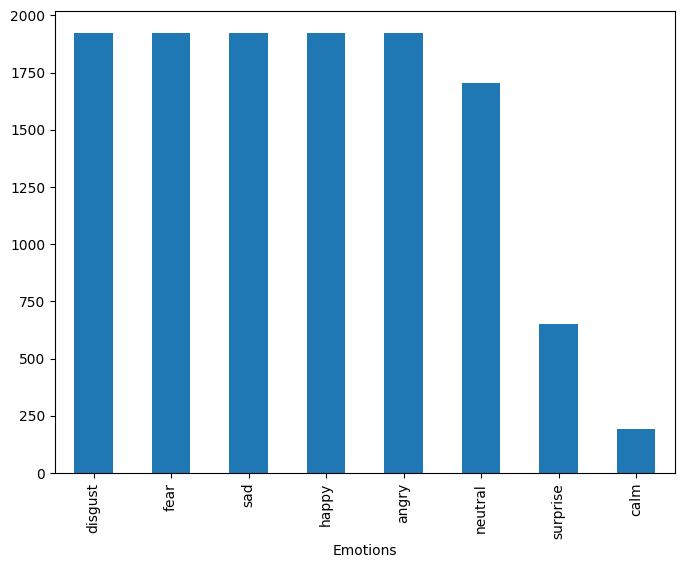

In [112]:
df_merged['Emotions'].value_counts().plot(kind='bar', figsize=(8, 6))

# Data Preprocessing and Feature Extraction

In [113]:
processed_df = df_merged.copy()

In [114]:
processed_df

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
12157,angry,/kaggle/input/savee-database/AudioData/KL/a04.wav
12158,neutral,/kaggle/input/savee-database/AudioData/KL/n05.wav
12159,sad,/kaggle/input/savee-database/AudioData/KL/sa12...
12160,sad,/kaggle/input/savee-database/AudioData/KL/sa05...


In [115]:
import numpy as np
import librosa
import noisereduce as nr

SAMPLE_RATE = 22050 # standard
FRAME_LENGTH = int(0.025 * SAMPLE_RATE) 
HOP_LENGTH = int(0.010 * SAMPLE_RATE)   # 50% overlap - standard
WINDOW_TYPE = "hamming"

import librosa
import numpy as np

def preprocess_audio(file_path, SAMPLE_RATE=22050, MAX_DURATION=None):
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    def handle_duration(y, sr, max_duration=None):
        y_trimmed, _ = librosa.effects.trim(y, top_db=20, frame_length=512, hop_length=128)
        
        if max_duration:
            target_samples = int(max_duration * sr)
            if len(y_trimmed) > target_samples:
                start = (len(y_trimmed) - target_samples) // 2
                return y_trimmed[start:start+target_samples]
            else:
                padding = target_samples - len(y_trimmed)
                noise = np.random.normal(0, 0.001, padding) * np.linspace(1, 0, padding)
                return np.concatenate([y_trimmed, noise])
        return y_trimmed

    processed_audio = handle_duration(signal, sr, MAX_DURATION)
    

    return librosa.util.normalize(processed_audio)

processed_df['Signal'] = processed_df['Path'].apply(
    lambda x: preprocess_audio(x)
)


processed_df = processed_df[['Signal', 'Emotions', 'Path']]  

print(processed_df.head())

                                              Signal  Emotions  \
0  [0.10787081, -0.0003335561, -0.08369993, -0.06...  surprise   
1  [0.025175096, 0.033706874, 0.033665266, 0.0094...   neutral   
2  [0.06636967, 0.07077349, 0.070254065, 0.062637...   disgust   
3  [0.037544217, -0.042971045, 0.00070933433, -0....   disgust   
4  [0.0049283043, -0.0007059942, -0.0024445157, 0...   neutral   

                                                Path  
0  /kaggle/input/ravdess-emotional-speech-audio/a...  
1  /kaggle/input/ravdess-emotional-speech-audio/a...  
2  /kaggle/input/ravdess-emotional-speech-audio/a...  
3  /kaggle/input/ravdess-emotional-speech-audio/a...  
4  /kaggle/input/ravdess-emotional-speech-audio/a...  


In [116]:
audio_path = df_merged['Path'][0]  # This is the string path

audio_data, sampling_rate = librosa.load(audio_path, sr=22050)

Audio(processed_df['Signal'][0], rate=22050) 
#processed audio

In [117]:
Audio(audio_data, rate=22050) #not processed audio

# Data Augumentation

In [118]:
def white_noise(signal, noise_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augumented_signal = signal + noise * noise_factor
    return augumented_signal

def time_stretch(signal, stretch_rate):
    return librosa.effects.time_stretch(signal, rate=stretch_rate)  
    
def pitch_scale(signal, sr, num_semitones):#1.5-2:
    return librosa.effects.pitch_shift(y=signal, sr=sr, n_steps=num_semitones)

def random_gain(signal, min_factor, max_factor):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    
    # Clip values to prevent distortion (crucial for audio)
    augmented_signal = np.clip(augmented_signal, -1.0, 1.0)
    return augmented_signal
    
def shifting(signal):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(signal, shift_range)

In [119]:
from sklearn.model_selection import train_test_split
import random

train_df, test_df = train_test_split(
    processed_df,
    test_size=0.2,          
    shuffle=True,          
    random_state=42,      
    stratify=df_merged['Emotions'] 
)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df

,Signal,Emotions,Path
0,"[-0.013748007, -0.008628252, -0.008946749, -0....",neutral,/kaggle/input/cremad/AudioWAV/1076_DFA_NEU_XX.wav
1,"[-0.044717938, -0.04949299, -0.05029591, -0.04...",fear,/kaggle/input/cremad/AudioWAV/1073_MTI_FEA_XX.wav
2,"[0.022805246, -0.044708945, 0.00032775482, -0....",fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,"[0.012418961, 0.011547174, 0.010044065, 0.0037...",fear,/kaggle/input/cremad/AudioWAV/1080_ITS_FEA_XX.wav
4,"[0.05779562, 0.08517635, 0.077338874, 0.084502...",neutral,/kaggle/input/savee-database/AudioData/KL/n22.wav
...,...,...,...
2428,"[0.10582822, 0.107456766, 0.11029052, 0.109173...",happy,/kaggle/input/cremad/AudioWAV/1044_TAI_HAP_XX.wav
2429,"[-0.0148382215, 0.07907005, 0.016269661, -0.09...",disgust,/kaggle/input/cremad/AudioWAV/1016_TSI_DIS_XX.wav
2430,"[0.12506333, 0.15059672, 0.1291733, 0.12910627...",sad,/kaggle/input/cremad/AudioWAV/1063_IEO_SAD_HI.wav
2431,"[0.0078425985, 0.010916769, 0.015418853, 0.015...",neutral,/kaggle/input/cremad/AudioWAV/1058_DFA_NEU_XX.wav


In [120]:
def augment_data(train_df, sr=22050, num_augmentations=1):
    augmented_rows = []
    
    for idx, row in train_df.iterrows():
        original_signal = row['Signal']
        emotion = row['Emotions']
        path = row['Path']
        
        
        for _ in range(num_augmentations):
            #randomly select an augmentation with parameters
            augmentation = random.choice([
                #white noise with noise_factor between 0.01 and 0.1
                lambda sig: white_noise(sig, noise_factor=random.uniform(0.01, 0.1)),
                #time stretch with rate between 0.8 and 1.2
                lambda sig: time_stretch(sig, stretch_rate=random.uniform(0.8, 1.2)),
                #pitch shift with semitones between -2 and 2
                lambda sig: pitch_scale(sig, sr=sr, num_semitones=random.uniform(-2, 2)),
                #random gain between 0.5 and 1.5
                lambda sig: random_gain(sig, min_factor=0.5, max_factor=1.5),
                #shifting (already random)
                lambda sig: shifting(sig)
            ])

            try:
                augmented_signal = augmentation(original_signal)
                augmented_rows.append({
                    'Signal': augmented_signal,
                    'Emotions': emotion,
                    'Path': path
                })
            except Exception as e:
                print(f"Augmentation failed for {path}: {e}")
    
    augmented_df = pd.DataFrame(augmented_rows)
    return pd.concat([train_df, augmented_df], ignore_index=True)

            

augment_df = augment_data(train_df, sr=22050, num_augmentations=1)

In [122]:
augment_df

,Signal,Emotions,Path
0,"[-0.055498533, -0.061606735, -0.0678137, -0.06...",disgust,/kaggle/input/cremad/AudioWAV/1073_IWW_DIS_XX.wav
1,"[0.026056435, 0.015692644, 0.009903495, 0.0133...",happy,/kaggle/input/savee-database/AudioData/JE/h01.wav
2,"[0.044448543, -0.044059493, 0.024434023, -0.01...",fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,"[0.02182877, 0.023366833, 0.017596848, 0.00944...",sad,/kaggle/input/cremad/AudioWAV/1031_TAI_SAD_XX.wav
4,"[0.12994686, 0.15451494, 0.12934847, 0.1347593...",sad,/kaggle/input/cremad/AudioWAV/1047_ITS_SAD_XX.wav
...,...,...,...
19453,"[-0.011496794, -0.016908202, -0.013610707, -0....",happy,/kaggle/input/cremad/AudioWAV/1027_ITH_HAP_XX.wav
19454,"[-0.023332061, -0.023752233, -0.024949133, -0....",disgust,/kaggle/input/cremad/AudioWAV/1079_WSI_DIS_XX.wav
19455,"[0.018029075, 0.027811147, 0.014338432, 0.0103...",disgust,/kaggle/input/cremad/AudioWAV/1075_DFA_DIS_XX.wav
19456,"[0.018171911293952007, 0.003837393881099675, -...",sad,/kaggle/input/toronto-emotional-speech-set-tes...


In [123]:
augment_df_copy = augment_df.copy()
augment_df_copy #each signal has an augumented copy

,Signal,Emotions,Path
0,"[-0.055498533, -0.061606735, -0.0678137, -0.06...",disgust,/kaggle/input/cremad/AudioWAV/1073_IWW_DIS_XX.wav
1,"[0.026056435, 0.015692644, 0.009903495, 0.0133...",happy,/kaggle/input/savee-database/AudioData/JE/h01.wav
2,"[0.044448543, -0.044059493, 0.024434023, -0.01...",fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,"[0.02182877, 0.023366833, 0.017596848, 0.00944...",sad,/kaggle/input/cremad/AudioWAV/1031_TAI_SAD_XX.wav
4,"[0.12994686, 0.15451494, 0.12934847, 0.1347593...",sad,/kaggle/input/cremad/AudioWAV/1047_ITS_SAD_XX.wav
...,...,...,...
19453,"[-0.011496794, -0.016908202, -0.013610707, -0....",happy,/kaggle/input/cremad/AudioWAV/1027_ITH_HAP_XX.wav
19454,"[-0.023332061, -0.023752233, -0.024949133, -0....",disgust,/kaggle/input/cremad/AudioWAV/1079_WSI_DIS_XX.wav
19455,"[0.018029075, 0.027811147, 0.014338432, 0.0103...",disgust,/kaggle/input/cremad/AudioWAV/1075_DFA_DIS_XX.wav
19456,"[0.018171911293952007, 0.003837393881099675, -...",sad,/kaggle/input/toronto-emotional-speech-set-tes...


In [124]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#params
SR = 22050
N_MFCC = 13
ADD_DELTAS = True


augmented_train_df = augment_df_copy.copy()

def extract_features(signal):
    mfcc = librosa.feature.mfcc(y=signal, sr=SR, n_mfcc=N_MFCC)
    
    if mfcc.shape[1] < 3:
        return np.zeros(N_MFCC * 3)
    
    features = [mfcc]
    
    if ADD_DELTAS:
        delta1 = librosa.feature.delta(mfcc, width=min(9, mfcc.shape[1]-1))
        delta2 = librosa.feature.delta(mfcc, order=2, width=min(9, mfcc.shape[1]-1))
        features.extend([delta1, delta2])
    
    mfcc_matrix = np.concatenate(features, axis=0)
    return np.mean(mfcc_matrix, axis=1)

X_train = np.array(augmented_train_df['Signal'].apply(extract_features).tolist())
X_test = np.array(test_df['Signal'].apply(extract_features).tolist())

y_train = augmented_train_df['Emotions'].values
y_test = test_df['Emotions'].values

In [125]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Important: Use transform not fit_transform

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]
encoding_dim = 324

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, X_test_scaled),  
    verbose=1
)

encoder_model = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

Epoch 1/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0149 - val_loss: 0.7390
Epoch 2/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8819 - val_loss: 0.6854
Epoch 3/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7253 - val_loss: 0.6616
Epoch 4/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7115 - val_loss: 0.6463
Epoch 5/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6797 - val_loss: 0.6348
Epoch 6/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6733 - val_loss: 0.6262
Epoch 7/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6521 - val_loss: 0.6202
Epoch 8/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6842 - val_loss: 0.6159
Epoch 9/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6643 - val_loss: 0.6130
Epoch 10/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6424 - val_loss: 0.6111
Epoch 11/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6512 - val_loss: 0.6098
Epoch 12/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2944 - loss: 1.8526 - val_accuracy: 0.3834 - val_loss: 1.5587
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3846 - loss: 1.5288 - val_accuracy: 0.4013 - val_loss: 1.5227
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4132 - loss: 1.4808 - val_accuracy: 0.4275 - val_loss: 1.4445
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4332 - loss: 1.4370 - val_accuracy: 0.4378 - val_loss: 1.4272
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4471 - loss: 1.4072 - val_accuracy: 0.4455 - val_loss: 1.4317
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4447 - loss: 1.4053 - val_accuracy: 0.4538 - val_loss: 1.3989
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4630 - loss: 1.3718 - val_accuracy: 0.4502 - val_loss: 1.4006
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4576 - loss: 1.3707 - val_accuracy: 0.

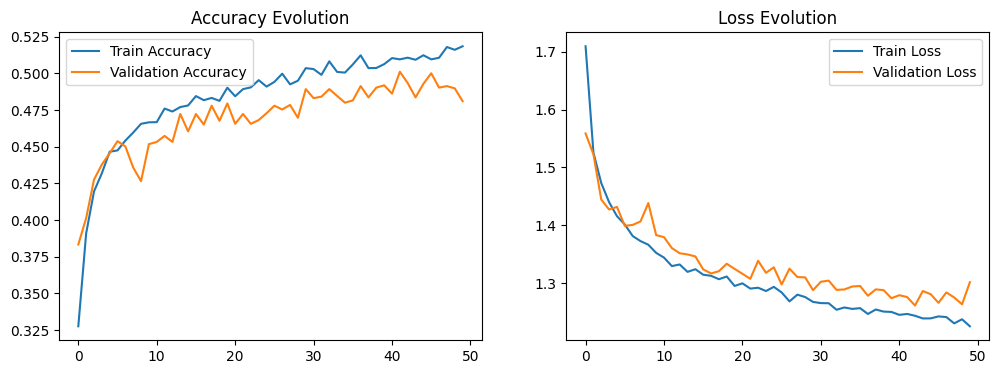

In [134]:
from tensorflow.keras import layers, models, utils
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

#build neural network
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_encoded, y_train_encoded,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

#evaluate neural network
print("\nNeural Network Performance:")
y_pred = np.argmax(model.predict(X_test_encoded), axis=1)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()
plt.show()

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



clf = SVC(kernel='rbf', C=10, gamma='scale')
clf.fit(X_train_encoded, y_train_encoded)

#evaluate
print(f"Accuracy: {clf.score(X_test_encoded, y_test_encoded):.2f}")

Accuracy: 0.55


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train_encoded, y_train_encoded)
print(f"RF Accuracy: {rf.score(X_test_encoded, y_test_encoded):.2f}")

#Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=500)
mlp.fit(X_train_encoded, y_train_encoded)
print(f"MLP Accuracy: {mlp.score(X_test_encoded, y_test_encoded):.2f}")

RF Accuracy: 0.48
MLP Accuracy: 0.51


# Regression Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import ssl
 
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emiliaaleksanyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emiliaaleksanyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emiliaaleksanyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [4]:
train_set = pd.read_csv("/Users/emiliaaleksanyan/Desktop/New Folder With Items/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/Users/emiliaaleksanyan/Desktop/New Folder With Items/test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)


In [6]:
train_set.describe() #the proportion of train and test sets is not 80 to 20 as we can see

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
test_set.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


In [8]:
train_set.head() #as we can see tweets are pretty "noisy"

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
train_set.duplicated().any()

False

In [10]:
test_set.duplicated().any()

False

In [12]:
def clean_tweet(text):
    #remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    #remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    #remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #convert to lowercase
    text = text.lower()
    
    #tokenize text
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    
    tokens = [word for word in tokens if word not in stop_words]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    #join tokens back to string
    text = ' '.join(tokens)
    
    #remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [13]:
pd.options.mode.chained_assignment = None  # Disable warning
train_set['cleaned_tweet'] = train_set['tweet'].apply(clean_tweet)
test_set['cleaned_tweet'] = test_set['tweet'].apply(clean_tweet)

In [14]:
train_set

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalised calgary wso condem...


In [15]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)

In [16]:
train_set

,label,tweet,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31958,0,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...
31959,0,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalised calgary wso condem...


In [30]:
features, targets = train_set["tweet"], train_set["label"]
train_x, test_x, train_y, test_y = train_test_split(
    features,
    targets,
    test_size=0.2,
    random_state=42,
    shuffle=True
)


In [31]:
tweet_tfidf = TfidfVectorizer(max_features=int(1e3)).fit(train_x)
train_features_tfidf = tweet_tfidf.transform(train_x)
test_features_tfidf = tweet_tfidf.transform(test_x)

In [32]:
cnt_vect = CountVectorizer().fit(train_x)
train_features_count = cnt_vect.transform(train_x)
test_features_count = cnt_vect.transform(test_x)

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

log_tfidf = linear_model.LogisticRegression()
tfidf_accuracy = cross_val_score(
    log_tfidf,
    train_features_tfidf,
    train_y,  
    cv=20
).mean()

print("\nLogistic regression model with 'tf-idf' method")
print("Cross-validation accuracy:", tfidf_accuracy)


Logistic regression model with 'tf-idf' method
Cross-validation accuracy: 0.9480231095547307


In [37]:
log_count = linear_model.LogisticRegression()
count_accuracy = cross_val_score(
    log_count,
    train_features_count,
    train_y,  
    cv=20
).mean()

print("\nLogistic regression model with 'count-vectors' method")
print("Cross-validation accuracy:", count_accuracy)



Logistic regression model with 'count-vectors' method
Cross-validation accuracy: 0.9600688747199557
